# Proyecto del Día 10 - Dashboard de un Análisis Exploratorio de Datos con Seaborn

## Introducción
Este notebook tiene como objetivo demostrar cómo utilizar Seaborn para **crear visualizaciones complejas y atractivas para el análisis exploratorio de datos** utilizando el dataset de `diamonds`, pertenenciente a la librería **Seaborn** en Python. Este dashboard incluirá visualizaciones que muestren:
* relaciones estadísticas
* distribuciones de variables
* comparaciones entre categorías

El estudiante deberá:
1. Cargar el dataset `diamonds` de Seaborn
2. Realizar un **análisis exploratorio** preliminar para familiarizarse con los datos
3. Crear visualizaciones que incluyan:
    * Relaciones entre variables numéricas (por ejemplo, precio vs. peso en quilates)
    * Distribuciones de variables numéricas (por ejemplo, precio, peso en quilates)
    * Comparaciones de variables numéricas agrupadas por categorías (por ejemplo, calidad del corte)
4. Utilizar `jointplot()` para explorar relaciones específicas entre pares de variables, incluyendo información estadística adicional
5. Emplear `pairplot()` para visualizar las relaciones entre todas las variables numéricas del dataset de manera conjunta
6. Ajustar los estilos y temas de las visualizaciones para mejorar la estética y legibilidad
7. Interpretar los gráficos generados, destacando hallazgos interesantes sobre los datos

No dejes de usar tu creatividad, explora, diviértete y en el medio de todo eso, aprende.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
diamantes = sns.load_dataset('diamonds')
diamantes.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
diamantes.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


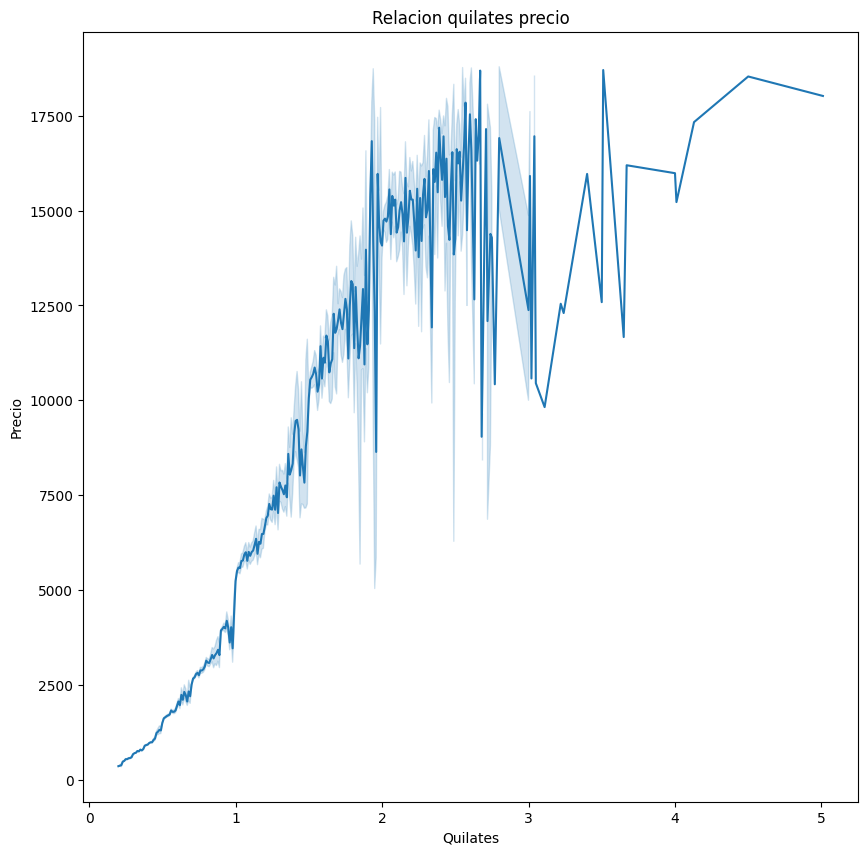

In [5]:
precio_quilates = sns.lineplot(data=diamantes,
                              x='carat',
                              y='price')
precio_quilates.figure.set_size_inches(10,10)
precio_quilates.set_xlabel('Quilates')
precio_quilates.set_ylabel('Precio')
precio_quilates.set_title('Relacion quilates precio');

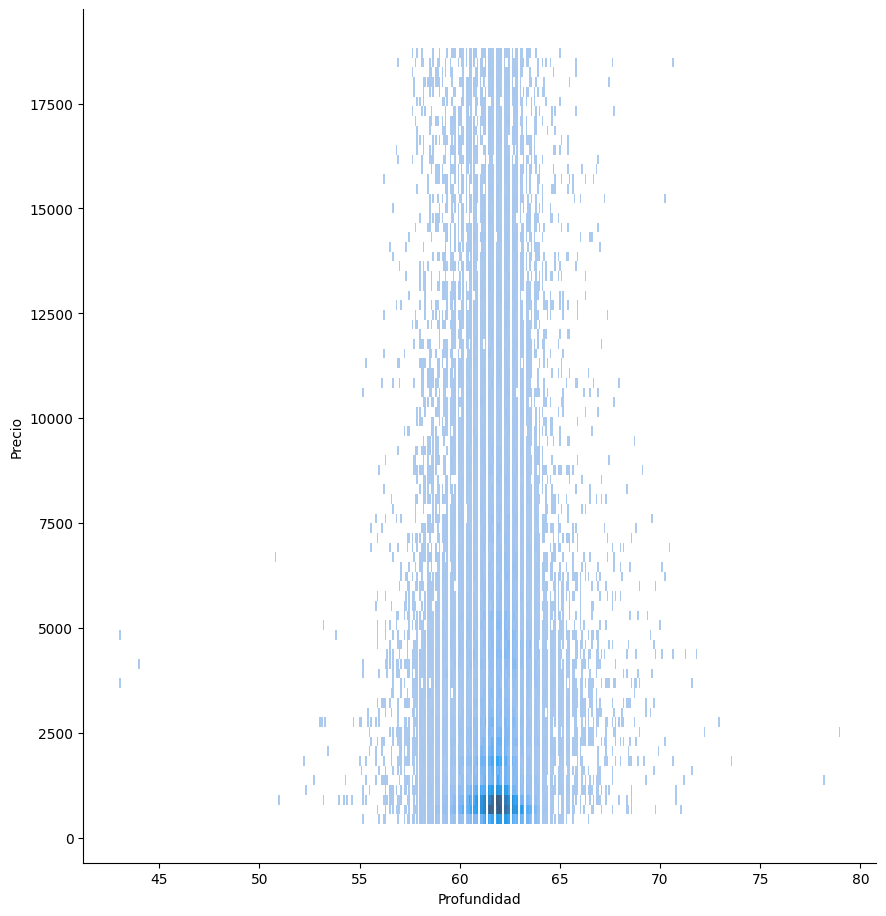

In [6]:
profundidad_precio = sns.displot(data=diamantes,
                                 x='depth',
                                 y='price')
profundidad_precio.set_axis_labels('Profundidad', 'Precio');
profundidad_precio.figure.set_size_inches(10,10);

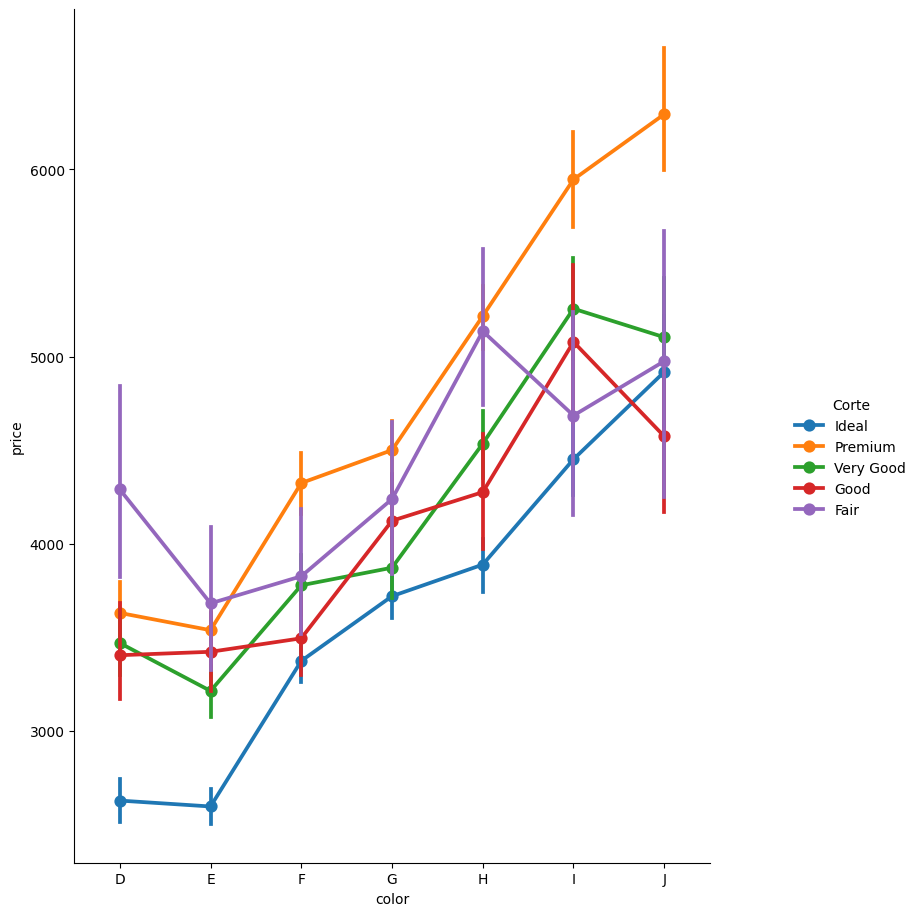

In [7]:
precio_color_corte = sns.catplot(data=diamantes,
                              kind='point',
                              x='color',
                              y='price',
                              hue='cut')
precio_color_corte.legend.set_title('Corte')
precio_color_corte.figure.set_size_inches(10,10);

Los diamantes de color 'J' con corte Premium son los mas caros del mercado seguido por los de color 'I' del mismo corte

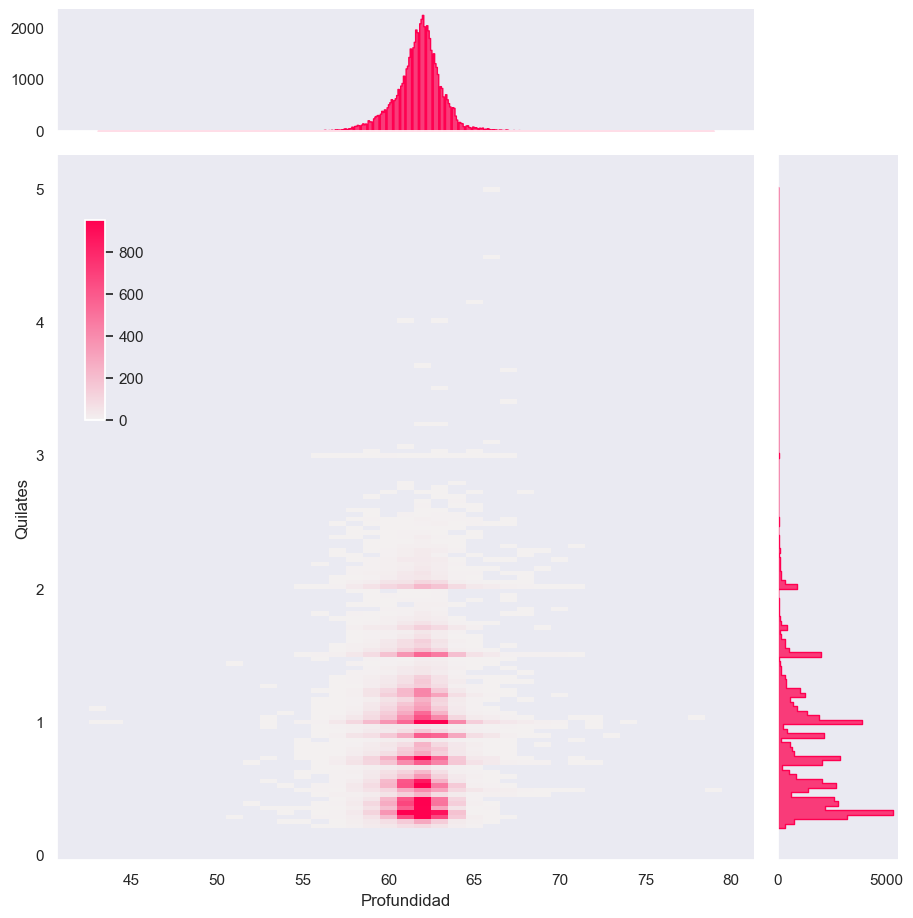

In [8]:
sns.set_theme(style='dark')
profundidad_quilates = sns.JointGrid(data=diamantes,
                                 x='depth',
                                 y='carat',
                                 marginal_ticks=True)
profundidad_quilates.ax_joint.set(yscale='linear')

cax = profundidad_quilates.figure.add_axes([.15, .55, .02, .2])

profundidad_quilates.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#ff0050", pmax=.8, cbar=True, cbar_ax=cax )

profundidad_quilates.plot_marginals(sns.histplot, element = 'step', color="#ff0050")
profundidad_quilates.set_axis_labels('Profundidad', 'Quilates')
profundidad_quilates.figure.set_size_inches(10,10);

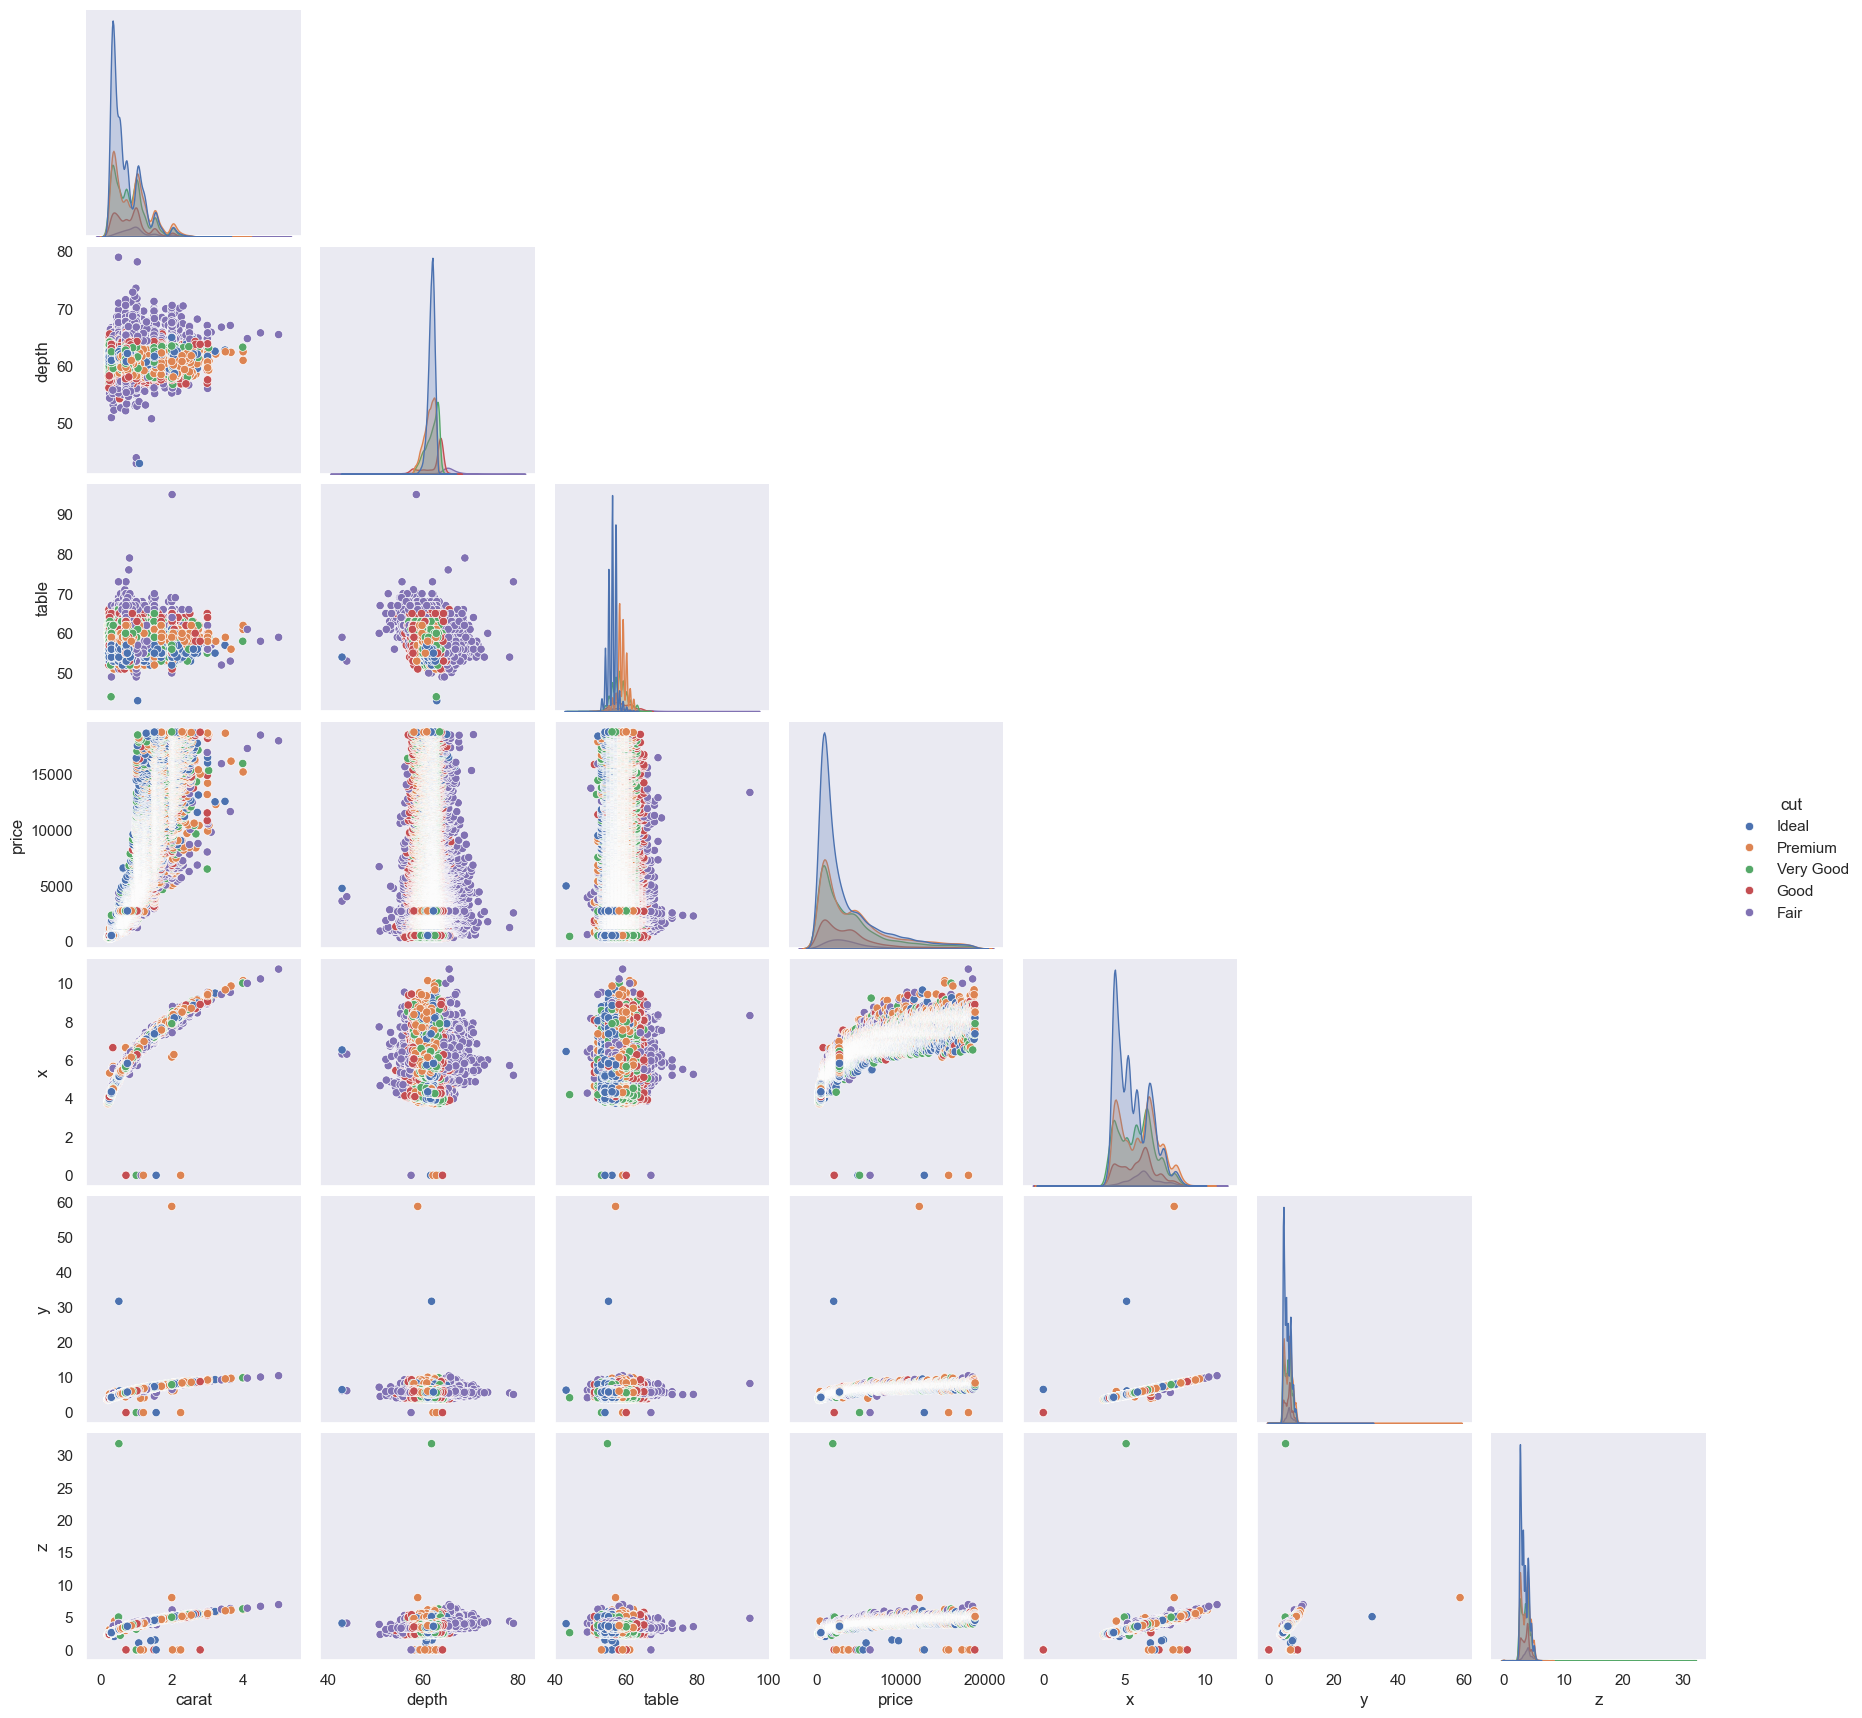

In [9]:
g = sns.pairplot(data=diamantes,
             hue='cut',
             corner=True);